# Part 1

The following code represents a simple, inefficient pattern search that might be found during EDA in a jupyter notebook.

In a separate `.py` file, refactor this code using OOP to make it more extensible and efficient.

Your object should be able to do each of the following:

1. Accept either a string or a list of words as input text to be searched for pattern matches (if a string is passed, only words in the string that match the pattern should be caught)
2. Allow for registering an arbitrary number of pattern groups to search input text
3. Allow the user to specify a specific pattern group to search the text for matches
4. Allow the user to search input text with all registered patterns and return all matches by pattern group

In [1]:
import pandas as pd
import re
import time
import requests
import matplotlib.pyplot as plt

### BaseImplementation

In [85]:
# #my_words = ['dog', 'cat', 'mouse', 'bird', 'snake', 'kitten', 'puppy', 'rat', 'cat']
# my_words = test

# pattern_1_words = []
# pattern_2_words = []

# pattern_group_1 = [
#     'plas',
#     'dry'
# ]

# pattern_group_2 = [
#     'in',
#     'mo'
# ]

# start = time.time()
# for word in my_words:
#     for pat in pattern_group_1:
#         if pat in word:
#             pattern_1_words.append(word)
# print(time.time() - start)

# start = time.time()
# for word in my_words:
#     for pat in pattern_group_2:
#         if pat in word:
#             pattern_2_words.append(word)
# print(time.time() - start)

# print(f"Pattern 1: {pattern_1_words}")
# #print(f"Pattern 2: {pattern_2_words}")

### Pattern_Match Class
- Will be written to .py file and imported
- Was considering Rabin-Karp or Boyer-Moore-Horsepool
- Decided against above due to search object being list of strings
- Implementation is an index of each match in list
- Requires a reference list 


# Part 2

Writes tests for your code using `pytest`

### To Run

1. Create preferred virtual environment using requirements.txt
2. In virtual environment run `pytest`

* Benchmark tests are testing indexing speed on 30,000 (Alice in Wonderland) and 200,000 (Moby Dick) word test sets
 * Arbitrarily, 30,000 words takes .3 seconds and 200,000 takes 3 minutes on my machine.  

# Part 3

Imagine your job is to help build the text processing pipeline for a machine learning model. This model takes strings, processes them into vectors, and then classifies the text as relating to one of several categories (a multiclass classifier).

The raw data that is passed into the machine learning pipeline has strings that may include descriptions of many items, including multiple items that we are seeking to classify, as well as descriptions of items that are irrelevant to our classifier. These must be separated before being passed to classifier.

As the newest member of the team, your job is to get up to speed with the data as quickly as possible, and to find opportunities to improve the text processing pipeline. Perform an EDA on the following CSV to accomplish this. Be prepared to explain what insights you learned from the data, and what approaches you might use to improve the pipeline.

Perform the analysis in this notebook, below this prompt.

In [3]:
import utils
import index

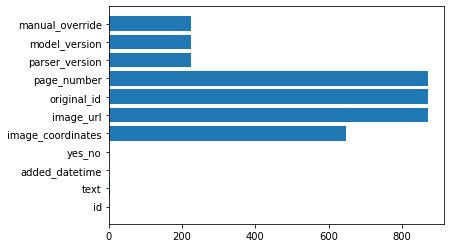

In [91]:
df = pd.read_csv('takehome.csv')

# Making an assumption that the 'no's' are the no's
df_yes = df.loc[df['yes_no'] == 'yes']
df_no = df.loc[df['yes_no'] == 'no']


nans = [df_yes[i].isna().sum() for i in df_yes.columns]

fig, ax = plt.subplots()

x = df_yes.columns
y = nans

ax.barh(x, y)

plt.show()

In [92]:
df_common_yes = df_yes[['yes_no', 'added_datetime', 'text', 'id']]
df_common_no = df_no[['yes_no', 'added_datetime', 'text', 'id']]

df_common

text = list(df_common['text'].apply(lambda x: replace_nans(x)))
text

['tin and aluminum food and drink cans ',
 'corrugated and non corrugated includes cereal type boxes and egcartons ',
 'includes all colors office paper newspapers magazines catalogs envelopes with windows and phone books ',
 'numbers 1 7',
 'clear green and brown bottles and jars ',
 'beer bottles juice containers food containers pop bottles wine and liquor bottles',
 'aluminum cans aluminum pie plates aluminum foil tin food beverage cans coffee cans',
 'plastics 1 7 such as those from cleaners food containers bleach milk cooking oils pill bottles cosmetics lotions shampoo conditioner soft drinks detegnts flower pots water or juice',
 'catalogs cereal boxes shredded paper mail toilet paper rolls frozen food boxes greeting cards boxboard eg pop boxes ',
 'office paper white and colored phonebooks corrugated cardboard tissue boxes snack boxes pop and beer cartons wrapping paper tubes paper gift shopping bags nut or chip canister eg pringles ',
 '1 7 plastic containers this includes milk

In [96]:
t = [[], ['one', 'tow']]
f = pd.DataFrame(t)
f['g'] = [[], ['f', 'g']]
f

,0,1,g
0,None,None,[]
1,one,tow,"[f, g]"


In [74]:
def replace_nans(x):
    if type(x) != str:
        return 'none'
    else:
        out = re.sub('e.g.', 'eg', x)
        out = re.sub('[^a-zA-Z0-9 ]', ' ', out)
        out = re.sub(r'\s+', ' ', out)
        return out.lower()
    
text = list(df_common['text'].apply(lambda x: replace_nans(x)))


# double dictionary to keep track of heritage?
text = " ".join([i for i in text]).split(' ')
indexed = index.Indexer(text)
text = sorted(text, reverse=True)

text_keys_yes = sorted(list(set(text)))

word_counts = {i:0 for i in text_keys}
for i in text:
    if i in word_counts:
        word_counts[i] += 1
        
df_counts = pd.DataFrame([word_counts.keys(), word_counts.values()]).T
df_counts = df_counts.sort_values(by=1, ascending=False)

<BarContainer object of 50 artists>

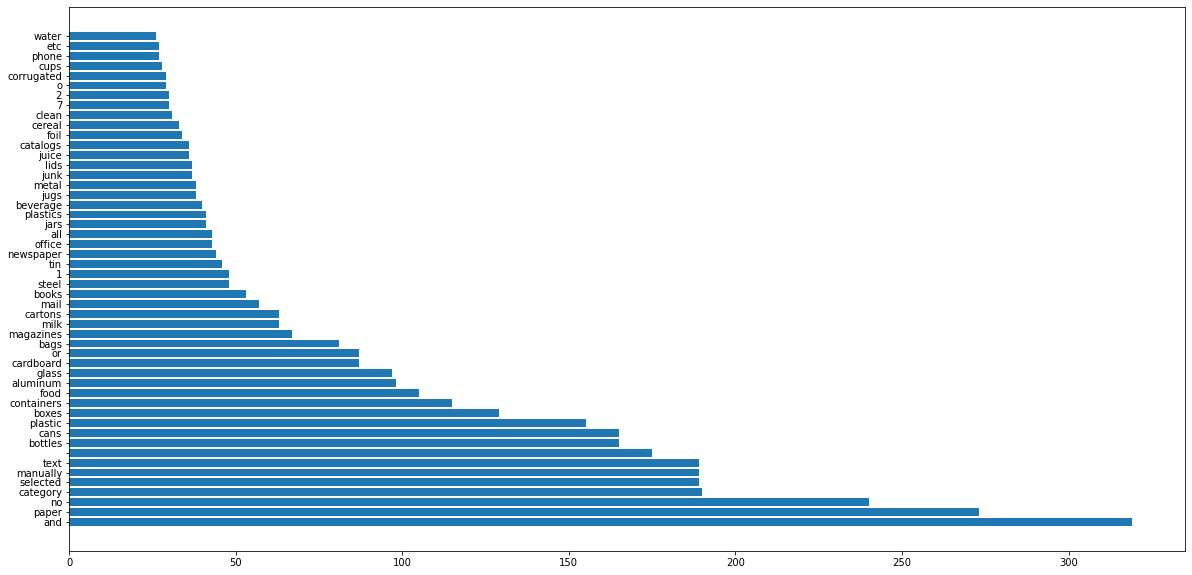

In [84]:
top_50 = df_counts.head(50)

top_50_words = top_50[0]
top_50_counts = top_50[1]

fig, ax = plt.subplots()

fig.set_size_inches(20, 10)

x = top_50_words
y = top_50_counts

ax.barh(x, y)



In [88]:
df.loc[df['yes_no'] == 'no'].head(50)

,id,text,added_datetime,yes_no,image_coordinates,image_url,original_id,page_number,parser_version,model_version,manual_override
0,462548,No plastic bags or pesticide containers .,2021-07-13 01:18:01.983,no,"{'originalSize': {'height': 1700, 'width': 220...",NaN,NaN,NaN,NaN,NaN,NaN
1,462549,No paint or aerosol cans .,2021-07-13 01:18:01.983,no,"{'originalSize': {'height': 1700, 'width': 220...",NaN,NaN,NaN,NaN,NaN,NaN
7,462555,Broken glass,2021-07-13 01:20:44.027,no,"{'originalSize': {'height': 4696, 'width': 189...",NaN,NaN,NaN,NaN,NaN,NaN
8,462556,Aerosol cans Gas cans,2021-07-13 01:20:44.027,no,"{'originalSize': {'height': 4696, 'width': 189...",NaN,NaN,NaN,NaN,NaN,NaN
9,462557,"Mirror / window glass , crystal , drinking gla...",2021-07-13 01:20:44.027,no,"{'originalSize': {'height': 4696, 'width': 189...",NaN,NaN,NaN,NaN,NaN,NaN
10,462558,Gift wrap,2021-07-13 01:20:44.027,no,"{'originalSize': {'height': 4696, 'width': 189...",NaN,NaN,NaN,NaN,NaN,NaN
11,462559,Plastic grocery bags,2021-07-13 01:20:44.027,no,"{'originalSize': {'height': 4696, 'width': 189...",NaN,NaN,NaN,NaN,NaN,NaN
12,462560,Styrofoam,2021-07-13 01:20:44.027,no,"{'originalSize': {'height': 4696, 'width': 189...",NaN,NaN,NaN,NaN,NaN,NaN
26,462571,Shingles - Ashes - Chemicals - Yard Waste - Ra...,2021-07-13 01:24:06.413,no,"{'originalSize': {'height': 4084, 'width': 160...",NaN,NaN,NaN,NaN,NaN,NaN
28,462573,Aerosol Cans Ceramic Dishes and Mugs Glass Coo...,2021-07-13 01:25:36.340,no,"{'originalSize': {'height': 2200, 'width': 170...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Considering making n-gram indexer
# Should do k-means clustering - dbscan to generate classes

# class skew
# class distribution
# word distribution